In [110]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Для начала основную папку определил в переменную

In [28]:
list_folders = os.listdir('/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data')

Создал список со всеми ссылками
Создал цикл в котором считались все названия папок в переменной созданной ранее, и создается новая переменная, содержащая в себе старый путь + названия перебранных папок. 
Далее внутри этого цикла есть еще один цикл, который к предыдущей переменной добавляет название папки внутри предыдущей папки.
И следующий цикл делает тоже самое в следующей папке.
В последнем цикле внутри цикла внутри цикла переменная path3 содержит в себе полный путь до каждого файла, и записывает их в список paths_list

In [61]:
paths_list = []

for folder in list_folders:
    path = ('/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data' + '/' + folder)
    for folder in os.listdir(path):
        path2 = (path + '/' + folder)
        for folder in os.listdir(path2):
            path3 = (path2 + '/' + folder)
            paths_list.append(path3)

In [63]:
paths_list

['/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Rostislav_Petrov/data.csv',
 '/home/jupyter-v-kichigin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Kirill_Smirnov/data.csv',
 '/ho

Здесь создается уже единый датафрейм df, через список.
Создаем цикл для каждого пути в paths_list. Внутри цикла создаем переменную df_path, в которую считывается датафрейм из одного файла, добавляется к нему колонки name и date через сплит пути к этому файлу. в конце цикла к списку df добавляется df_path.
После цикла все датафреймы в списке df объединяются в big_data через pd.concat, куда передается список df

In [104]:
df = []
for path in paths_list:
    df_path = pd.read_csv(path)
    df_path['name'] = path.split('/')[-2]
    df_path['date'] = path.split('/')[-3]
    df.append(df_path)
big_data = pd.concat(df, ignore_index=True)

In [105]:
big_data

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [107]:
big_data.quantity.sum()

480

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [109]:
big_data.groupby('name', as_index = False).agg({'quantity':'sum'}).sort_values('quantity')

,name,quantity
20,Vasiliy_Petrov,7
2,Alexey_Petrov,7
15,Rostislav_Ivanov,9
8,Kirill_Petrov,9
12,Petr_Petrov,14
18,Vasiliy_Fedorov,15
14,Rostislav_Fedorov,16
1,Alexey_Ivanov,17
17,Rostislav_Smirnov,17
9,Kirill_Smirnov,17


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

    по оси x – идентификаторы товаров (product_id) 
    по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [114]:
new_big_data = big_data.groupby('product_id', as_index = False).agg({'quantity':'sum'})

In [115]:
new_big_data

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


In [120]:
sns.set(rc={'figure.figsize':(23.4,16.54)})

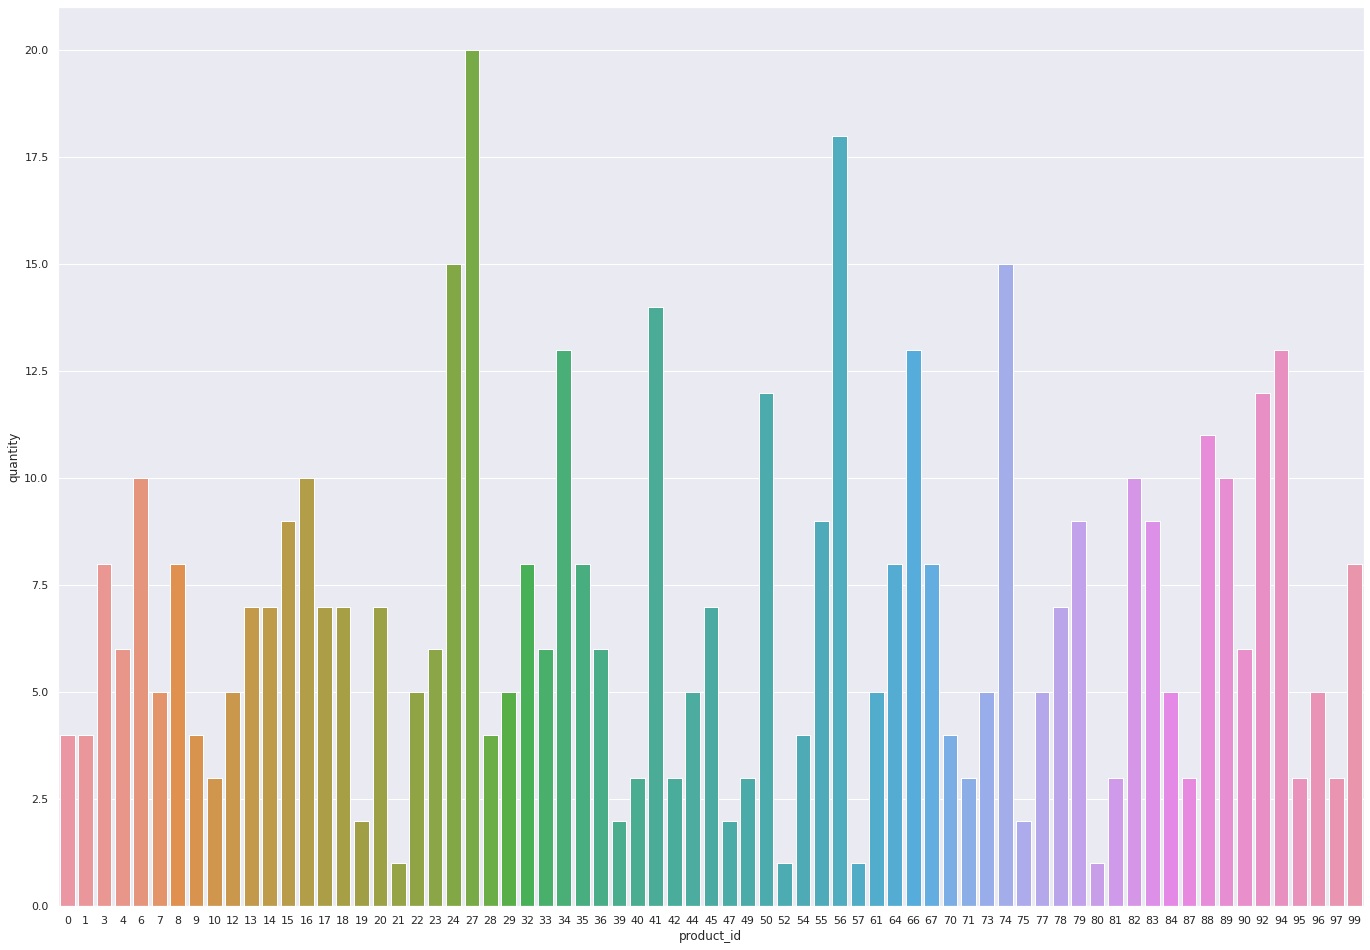

In [121]:
sns.barplot(x="product_id", y="quantity", data=new_big_data)

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). 

In [122]:
new_big_data_with_data = big_data.groupby('date', as_index = False).agg({'quantity':'sum'})

In [123]:
new_big_data_with_data

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


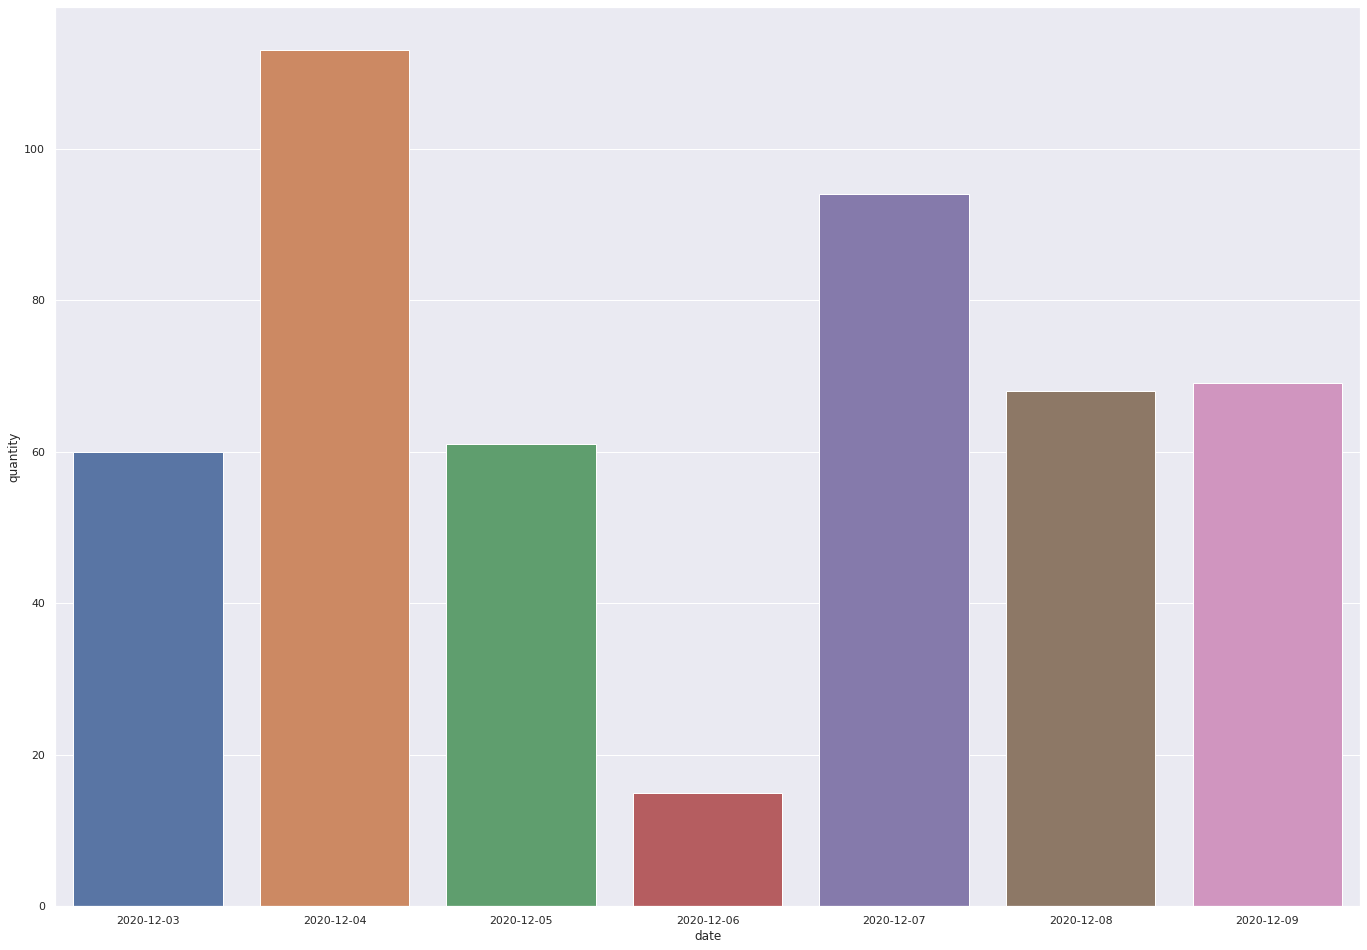

In [124]:
sns.barplot(x="date", y="quantity", data=new_big_data_with_data)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [151]:
new_new_data = big_data.groupby(['name', 'product_id'], as_index = False).agg({'date':'nunique'}).query('date > 1')

In [152]:
new_new_data

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
